In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Part A: Data Cleaning & Exploratory Analysis

##### 1. Import full data set using Pandas

In [2]:
bottle_df = pd.read_csv("bottle.csv", dtype='unicode', low_memory=False)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50000,33.44000,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46000,33.44000,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46000,33.43700,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45000,33.42000,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45000,33.42100,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle_df.shape

(864863, 74)

##### 2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values

In [4]:
bottle_df = bottle_df[['T_degC', 'Salnty', 'STheta']]
bottle_df = bottle_df.dropna()
bottle_df.shape

(812174, 3)

In [5]:
bottle_df = bottle_df.astype(float)

In [6]:
bottle_df.describe()

,T_degC,Salnty,STheta
count,812174.000000,812174.000000,812174.000000
mean,10.847904,33.842424,25.819394
std,4.221005,0.461567,1.167787
min,1.440000,28.431000,20.934000
25%,7.750000,33.490000,24.965000
50%,10.100000,33.869200,25.996000
75%,13.910000,34.198000,26.646000
max,31.140000,37.034000,250.784000


<AxesSubplot:>

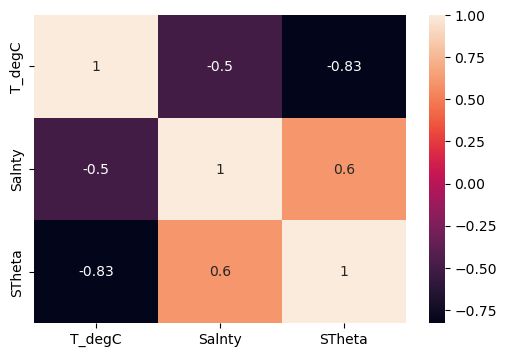

In [7]:
# Create the heatmap using Seaborn for our correlation matrix
sns.heatmap(bottle_df.corr(), annot=True)

##### 3. Build the following plots using matplotlib
    
a. Scatter: Salnty (salinity of water) vs T_degC


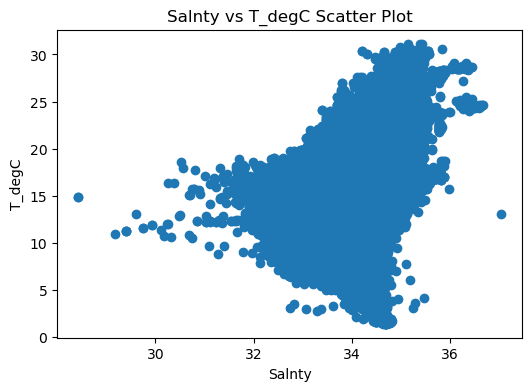

In [8]:
# Create a scatter plot
plt.scatter(bottle_df['Salnty'], bottle_df['T_degC'])

# Add axis labels and a title
plt.xlabel("Salnty")
plt.ylabel("T_degC")
plt.title("Salnty vs T_degC Scatter Plot")

# Display the plot
plt.show()

b. Scatter: STheta (density of water) vs T_degC

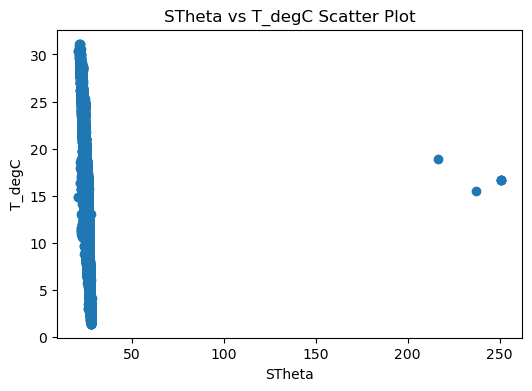

In [9]:
# Create a scatter plot
plt.scatter(bottle_df['STheta'], bottle_df['T_degC'])

# Add axis labels and a title
plt.xlabel("STheta")
plt.ylabel("T_degC")
plt.title("STheta vs T_degC Scatter Plot")

# Display the plot
plt.show()

##### 4. Build the following plot using seaborn

a. Distribution of T_degC 

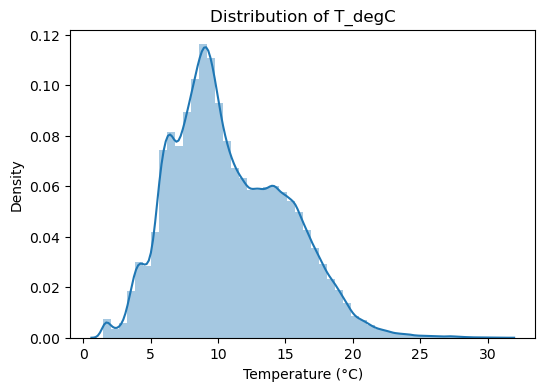

In [10]:
# create the distribution plot using seaborn
sns.distplot(bottle_df['T_degC'])

# set the title and axis labels
plt.title('Distribution of T_degC')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')

# display the plot
plt.show()

##### 5. Remove obvious outliers from step 3b : STheta
Shape for clean data will be: (812168, 3)


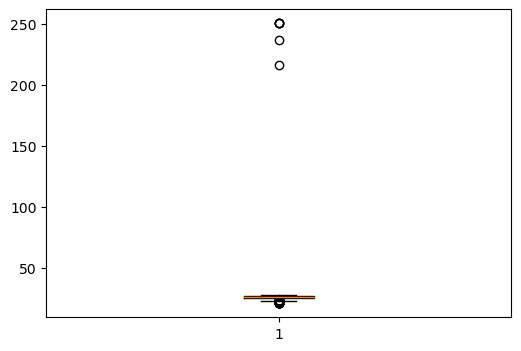

In [11]:
# Create a boxplot of the column 'STheta'
plt.boxplot(bottle_df['STheta'])

# Display the plot
plt.show()

In [12]:
bottle_df.sort_values(by='STheta',ascending=False).head(10)

,T_degC,Salnty,STheta
852222,16.642,33.1288,250.7840
852224,16.642,33.1288,250.7840
852223,16.642,33.1288,250.7840
852221,16.642,33.1288,250.7840
847558,15.556,33.0599,237.1793
847549,18.893,33.0359,216.5753
809349,4.210,35.4620,28.1390
9204,3.100,35.2500,28.0830
62528,3.690,35.2800,28.0490
564387,13.080,37.0340,27.9540


In [13]:
bottle_new_df = bottle_df[bottle_df['STheta']<200]
bottle_new_df.shape

(812168, 3)

##### 6. Plot 3b again – does it look better? Explain!

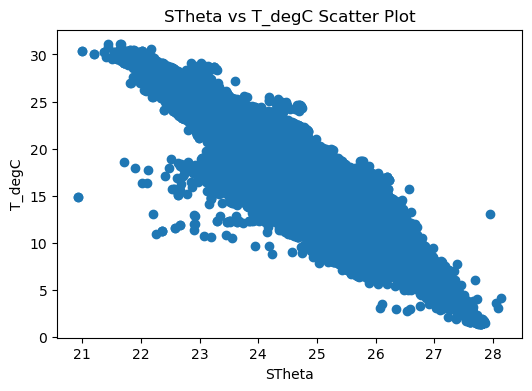

In [14]:
# Create a scatter plot
plt.scatter(bottle_new_df['STheta'], bottle_new_df['T_degC'])

# Add axis labels and a title
plt.xlabel("STheta")
plt.ylabel("T_degC")
plt.title("STheta vs T_degC Scatter Plot")

# Display the plot
plt.show()

The scatter plot shows the relationship between two variables Stheta and T_degC. 

Yes, post removing the outliers our scatter plot looks better and is ready for Linear Regression.

Before performing linear regression, the scatter plot helps us visually inspect the relationship between the two variables and determine if there is a linear or nonlinear relationship between them.

The scatter plot now shows a clear linear pattern, linear regression is appropriate for modeling the relationship between the two variables as Linear regression tries to model the relationship between two variables by fitting a straight line through the data points.

### Part B: Train & Test Split

In [15]:
#splitting into X,y
X = bottle_new_df.drop('T_degC', axis=1)
y = bottle_new_df['T_degC']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(649734, 2)

### Part C: Linear Regression Using Normal Equation - Coded In Python



In [17]:
#Add a column of ones to the X_train matrix to represent the intercept term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_train.shape

(649734, 3)

In [18]:
#Calculate the coefficients using the normal equation
coeffs = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print(coeffs)


[35.64451188  3.11151204 -5.03907257]


In [19]:
#Add a column of ones to the X_test matrix to represent the intercept term
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

#Make predictions on new data
y_pred = X_test.dot(coeffs)
y_pred

array([ 7.88437556,  7.14969722,  5.22668207, ...,  7.14752462,
       16.11974133, 15.64019849])

In [20]:
### reference code for computing metrics without sklearn library

#Calculate mean squared error
mse = np.mean((y_test - y_pred)**2)

#Calculate r-squared
ssr = np.sum((y_pred - y_test.mean())**2)
sst = np.sum((y_test - y_test.mean())**2)
r_squared = ssr / sst

#Calculate explained variance
explained_variance = 1 - (np.var(y_test - y_pred) / np.var(y_test))

print(mse, r_squared, explained_variance)


0.23378301431802537 0.9886986688263295 0.9868919614560818


In [21]:
#calculate evaluation metrics
sk_mse = mean_squared_error(y_test, y_pred)
sk_r_squared = r2_score(y_test, y_pred)
sk_explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean squared error:", sk_mse)
print("R-squared:", sk_r_squared)
print("Explained variance:", sk_explained_variance)

Mean squared error: 0.2337830143180255
R-squared: 0.9868919565634323
Explained variance: 0.9868919614560818


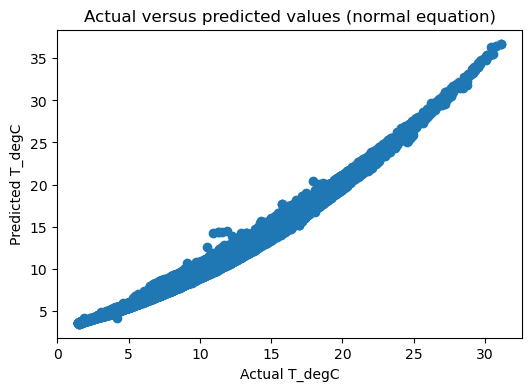

In [22]:
#Create a scatterplot of actual versus predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual T_degC")
plt.ylabel("Predicted T_degC")
plt.title("Actual versus predicted values (normal equation)")
plt.show()
plt.show()


### Part D: Using sklearn API


In [23]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Fit lin_reg using X_train and y_train
lin_reg.fit(X_train, y_train)

# Print out the coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)


Intecept: 35.644511878050054
Coefficients: [ 0.          3.11151204 -5.03907257]


In [24]:
# Predict T_degC for the test data using the fitted values in lin_reg
y_pred_sklearn = lin_reg.predict(X_test)

# Calculate mean squared error, r-squared, and explained variance for the test data
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
evs_sklearn = explained_variance_score(y_test, y_pred_sklearn)

# Print the evaluation metrics
print("Mean squared error:", mse_sklearn)
print("R-squared:", r2_sklearn)
print("Explained variance:", evs_sklearn)


Mean squared error: 0.2337830143181185
R-squared: 0.9868919565634271
Explained variance: 0.9868919614560767


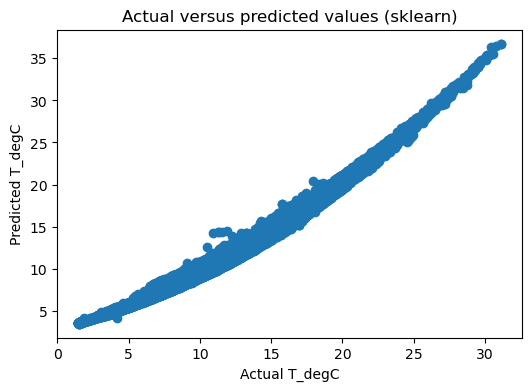

In [25]:
# Create a scatterplot of actual versus predicted values
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel("Actual T_degC")
plt.ylabel("Predicted T_degC")
plt.title("Actual versus predicted values (sklearn)")
plt.show()

Both the normal equation and the LinearRegression model class in sklearn library produce the same results. This can be observed via the visualisation and the evaluation metrics of both the methods.

### Part E: Conceptual Questions


<i>1. Why is it important to have a test set?</i>

The <b>test set</b> allows us to evaluate how well our model generalizes to new, unseen data. It is used to <b>assess the performance of the model.</b> By evaluating the model on the test set, we can get an estimate of its performance on new data and can identify any issues with overfitting.

<br>

<i>2. If the normal equation always provides a solution, when would we not want to use it?</i>

* <b>Large dataset:</b> The normal equation involves computing the inverse of a matrix, which can be computationally expensive and time-consuming for large datasets.


* <b>Non-linear relationships:</b> The normal equation assumes a linear relationship between the input variables and the target variable. If the relationship is non-linear, then the normal equation will not provide an accurate model.


* <b>Online learning:</b> The normal equation requires access to the entire training dataset to compute the optimal coefficients. If new data is constantly being added, then the normal equation is not a suitable method.

<br>

<i>3. How might we improve the fit of our models from Part C & D?</i>

* <b>Standardize variables:</b> Standardizing variables can help to reduce the impact of variables with different scales on the fit of our linear regression model. This can be especially important because variables (['T_degC', 'Salnty', 'STheta']) have very different units of measurement.

* <b>Regularize the model:</b> Regularization techniques, such as Ridge regression and Lasso regression, can help to improve the fit of a linear regression model by reducing the impact of multicollinearity and overfitting.

<br>

<i>4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. </i>

The <b>bias-variance tradeoff</b> involves finding the right balance between these two types of errors: bias and variance. It describes the relationship between the complexity of a model and its ability to generalize to new data. 

<b>Bias error</b> arises when the model is too simple and unable to capture the underlying patterns in the data. Models with high bias tend to be overly simplistic and may underfit the training data, resulting in poor performance on both the training and test data.

<b>Variance,</b> on the other hand, refers to the error that is introduced by a model that is too complex and overfits the training data. This error arises when the model is too sensitive to the noise in the training data and fails to generalize to new, unseen data. Models with high variance tend to fit the training data too well and may fail to generalize to new data.

As we increase the complexity of a model, we typically reduce bias but increase variance. Conversely, as we decrease the complexity of a model, we typically increase bias but reduce variance. <b>The goal is to find the sweet spot in the middle where the model has enough complexity to capture the underlying patterns in the data but not so much complexity that it overfits the training data.</b>

<br>

<i>5. In a linear regression model, how might we reduce bias?</i>

In a linear regression model, <b>bias</b> can be reduced by <b>increasing the complexity of the model.</b> This can be achieved by <b>adding more features to the model</b> or by <b>increasing the order of the polynomial used to fit the data.</b>

It's worth noting that while reducing bias can improve the accuracy of the model, it can also increase its variance. Therefore, it's important to strike a balance between bias and variance when building a linear regression model.

<br>

<i>6. In a linear regression model, how might we reduce variance?</i>


In a linear regression model, <b>variance</b> can be reduced by <b>simplifying the model and reducing its complexity.</b> This can be achieved by <b>using regularization techniques, reducing the number of features or samples, or simplifying the model architecture.</b>

It's important to note that reducing variance can often come at the cost of increased bias. Therefore, it's important to find the right balance between bias and variance when building a linear regression model.

